# Análise do Dataset de Classificação

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/youtube_video_dataset.csv')
df.head()

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [3]:
colunas = list()
for coluna in df.columns:
    colunas.append(coluna)
print("Colunas:", " ".join(colunas))
print("Número de Linhas:", df.shape[0])
# Removendo as colunas que não são interessantes (nesse caso, apenas importa "Title", "Description" e "Category")
df = df.iloc[:, [0, 2, 3]]
colunas = list()
for coluna in df.columns:
    colunas.append(coluna)
print("Colunas:", " ".join(colunas))
print("Número de Linhas com Valores Nulos:", df.isna().sum().sum())
# Retirando linhas com valores nulos 
df = df.dropna()
print("Número de Linhas Após Remoção de Nulos:", df.shape[0])
print("Número de Linhas com Valores Nulos (Verificação):", df.isna().sum().sum())

Colunas: Title Videourl Category Description
Número de Linhas: 11211
Colunas: Title Category Description
Número de Linhas com Valores Nulos: 83
Número de Linhas Após Remoção de Nulos: 11128
Número de Linhas com Valores Nulos (Verificação): 0


In [4]:
df

,Title,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...
...,...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",Art&Music,Step by step video on creating an art journal ...
11207,Ar-Tea Collage * Mixed Media Art,Art&Music,"By: Ilene McInnes,\nMixed media Art and inspir..."
11208,DIY Mixed Media Art Collage Greeting Cards / M...,Art&Music,Make your own Mixed Media Greeting Cards\n\nHe...
11209,Art Collage Process DecoJournal using Rice Pap...,Art&Music,Art Collage Process DecoJournal using Rice Pap...


In [5]:
lista_categorias = df['Category'].value_counts().index.to_list()
dict_mapeamento = dict()
for i in range(len(lista_categorias)):
    dict_mapeamento[lista_categorias[i]] = i
df['Category'] = df['Category'].map(dict_mapeamento)
df.head()

,Title,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,2,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,2,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,2,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,2,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,2,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [6]:
import re

df['Title'] = df['Title'].apply(lambda x: x.lower()) # Substituindo letras maiúsculas por minúsculas
df['Title'] = df['Title'].apply(lambda x: re.sub("https?:\/\/.*?[\s+]"," ", x)) # Removendo URLs
df['Title'] = df['Title'].apply(lambda x: re.sub("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)"," ", x)) # Removendo emails
df['Title'] = df['Title'].apply(lambda x: re.sub("[^a-zA-Z]"," ", x)) # Filtrando símbolos
df['Description'] = df['Description'].apply(lambda x: x.lower())
df['Description'] = df['Description'].apply(lambda x: re.sub("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)"," ", x))
df['Description'] = df['Description'].apply(lambda x: re.sub("https?:\/\/.*?[\s+]"," ", x))
df['Description'] = df['Description'].apply(lambda x: re.sub("[^a-zA-Z]"," ", x))

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

lista_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# classe 6 é o total
dict_classes = {0: list(), 1: list(), 2: list(), 3: list(), 4: list(), 5: list(), 6: list()}
dict_avg_palavras_documento = {0: list(), 1: list(), 2: list(), 3: list(), 4: list(), 5: list(), 6: list()}

lista_frases = list()

for i, row in df.iterrows():
    classe = int(row['Category'])
    lista_palavra = word_tokenize(row['Title'])
    lista_palavra.extend(word_tokenize(row['Description']))
    lista_string = []
    for palavra in lista_palavra:
        if palavra not in lista_stopwords and len(palavra) > 1:
            palavra = ps.stem(palavra) # Stemming da palavra
            palavra = lemmatizer.lemmatize(palavra)
            lista_string.append(palavra)
            dict_classes[classe].append(palavra)
            dict_classes[6].append(palavra)
    dict_avg_palavras_documento[classe].append(len(lista_string))
    dict_avg_palavras_documento[6].append(len(lista_string))
    string = " ".join(lista_string)
    lista_frases.append(string)

array_frases = np.array(lista_frases)

## Número de Palavras em relação às Classes e à Quantidade de Linhas

<AxesSubplot:>

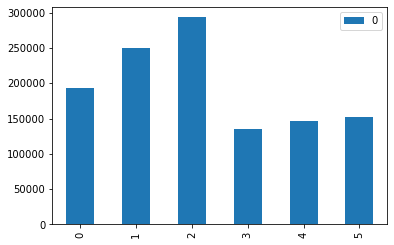

In [8]:
lista_qtd_palavras = list()

for key in dict_classes.keys():
    if key != 6:
        lista_qtd_palavras.append(len(dict_classes[key]))

df_qtd_palavras = pd.DataFrame(lista_qtd_palavras)
df_qtd_palavras.plot(kind='bar')

In [9]:
import numpy as np
for key in dict_avg_palavras_documento:
    tam = len(dict_avg_palavras_documento[key])
    avg = np.array(dict_avg_palavras_documento[key]).mean()
    if key != 6:
        print("Classe %d\tMédia: %.2f\tQuantidade de Linhas: %d" %(key, avg, tam))
    else:
        print("Total\t\tMédia: %.2f\tQuantidade de Linhas: %d" %(avg,tam))

Classe 0	Média: 87.80	Quantidade de Linhas: 2200
Classe 1	Média: 120.70	Quantidade de Linhas: 2074
Classe 2	Média: 160.44	Quantidade de Linhas: 1828
Classe 3	Média: 79.87	Quantidade de Linhas: 1699
Classe 4	Média: 87.23	Quantidade de Linhas: 1682
Classe 5	Média: 92.83	Quantidade de Linhas: 1645
Total		Média: 105.31	Quantidade de Linhas: 11128


In [10]:
df_classe_0 = pd.DataFrame(dict_classes[0], columns=['frequencia'])
df_classe_0['frequencia'].value_counts()

travel       4729
video        2707
blog         1981
vlog         1856
instagram    1672
             ... 
dio             1
abordamo        1
precioso        1
aerom           1
soo             1
Name: frequencia, Length: 18405, dtype: int64

In [11]:
df_classe_1 = pd.DataFrame(dict_classes[1], columns=['frequencia'])
df_classe_1['frequencia'].value_counts()

seeker        4697
scienc        3674
twitter       3208
technolog     2808
new           1694
              ... 
bonn             1
magoo            1
cartoonist       1
grandmoth        1
quieten          1
Name: frequencia, Length: 16141, dtype: int64

## Nuvem de Palavras

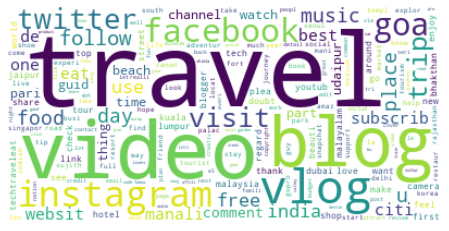

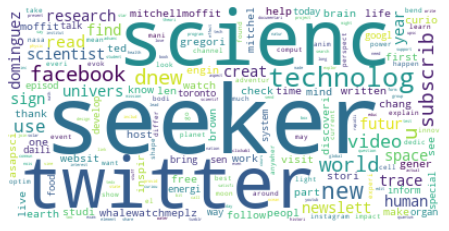

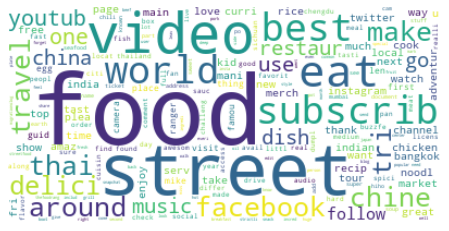

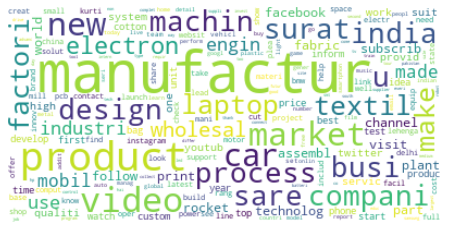

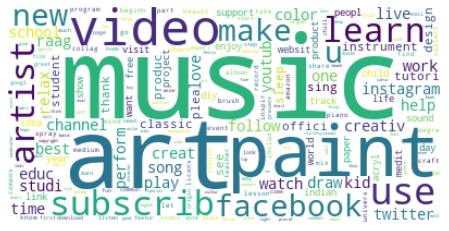

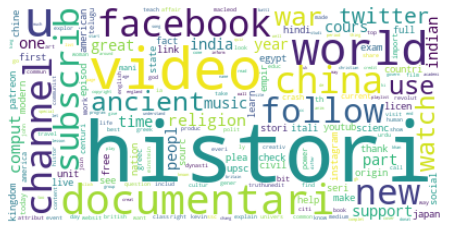

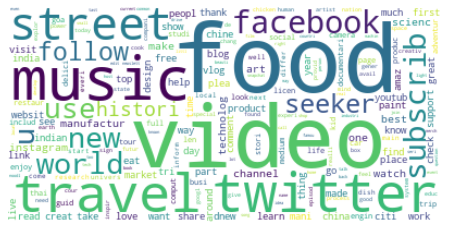

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = [8, 4]

for key in dict_classes.keys():
    text = " ".join(dict_classes[key])
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Dá para ver que tem muitas palavras que aparecem com alta frequência por classe. Um detalhe é que a palavra 'food' ela está bem presente tanto na sua própria categoria como também na de travel & blog (categoria 0). Tem outras palavras presentes em redes sociais como 'facebook', 'twitter' e 'video'.

<BarContainer object of 54159 artists>

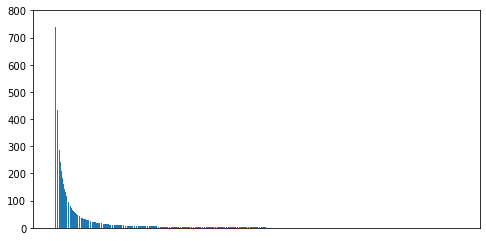

In [13]:
df_total = pd.DataFrame(dict_classes[6], columns=['frequencia'])
counter_desc = df_total['frequencia'].value_counts()
counter_asc = df_total['frequencia'].value_counts(ascending=True)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
ax = plt.gca()
ax.set_ylim([0, 800])
plt.bar(counter_desc.index, counter_desc.values)

Nesse caso a escala não tá tão boa porque a diferença entre as palavras com mais frequência 

In [14]:
df_total['frequencia'].value_counts()

food          13898
video         11675
music          7846
twitter        6550
travel         6402
              ...  
oriental          1
somaliland        1
italo             1
mbombela          1
cardmak           1
Name: frequencia, Length: 54159, dtype: int64

In [15]:
# Se quiser visualizar os value_counts (ordenado por frequência)
for key in dict_classes.keys():
    df_classe = pd.DataFrame(dict_classes[key], columns=['frequencia'])
    print("--- CLASSE %d ----" %(key))
    print(df_classe['frequencia'].value_counts())

--- CLASSE 0 ----
travel       4729
video        2707
blog         1981
vlog         1856
instagram    1672
             ... 
dio             1
abordamo        1
precioso        1
aerom           1
soo             1
Name: frequencia, Length: 18405, dtype: int64
--- CLASSE 1 ----
seeker        4697
scienc        3674
twitter       3208
technolog     2808
new           1694
              ... 
bonn             1
magoo            1
cartoonist       1
grandmoth        1
quieten          1
Name: frequencia, Length: 16141, dtype: int64
--- CLASSE 2 ----
food                       12448
street                      5841
video                       3304
eat                         2026
subscrib                    1977
                           ...  
xa                             1
liet                           1
dina                           1
ngo                            1
easyconversationpractic        1
Name: frequencia, Length: 14314, dtype: int64
--- CLASSE 3 ----
manufactur    3815
p